<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [25]:
import os
import re

import numpy as np
import pandas as pd

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [26]:
!unzip ../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
!ls

Archive:  ../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
replace Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
data
Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
LS_DS_414_Topic_Modeling_Assignment.ipynb
LS_DS_414_Topic_Modeling_Lecture.ipynb
__MACOSX
solutions


In [33]:
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [34]:
df.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateSeen        object
reviews.didPurchase     object
reviews.doRecommend     object
reviews.id             float64
reviews.numHelpful     float64
reviews.rating           int64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
dtype: object

In [35]:
df = df.astype({
    "dateAdded": np.datetime64,
    "dateUpdated": np.datetime64,
})

In [41]:
desc0 = df["reviews.text"][0]
print(desc0)

I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.


In [85]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

tokens = []
def tokenize(doc):
    return [
        re.sub(r"[^a-z0-9]", "", t.lemma_.lower()).strip() for t in tokenizer(doc)
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]

clean_reviews = list(df["reviews.text"].apply(tokenize))
clean_reviews[:3]

[['order',
  '3',
  'item',
  'bad',
  'quality',
  'miss',
  'backup',
  'spring',
  'pcs',
  'aluminum',
  'battery',
  'work'],
 ['bulk', 'expensive', 'way', 'product', 'like'],
 ['duracell', 'price', 'happy']]

In [133]:
type(nlp)

spacy.lang.en.English

In [86]:
topic_df = pd.DataFrame(index=df["primaryCategories"], data={"clean_reviews": clean_reviews})
topic_df.sample(5)

,clean_reviews
primaryCategories,
Health & Beauty,"[happy, purchase]"
Health & Beauty,[nice]
Health & Beauty,"[discharge, quickly]"
Health & Beauty,"[battery, job]"
Health & Beauty,"[great, battery, purchase, again, cant, beat, ..."


In [87]:
id2word = corpora.Dictionary(topic_df["clean_reviews"])

In [88]:
list(id2word.items())[:20]

[(0, '3'),
 (1, 'aluminum'),
 (2, 'backup'),
 (3, 'bad'),
 (4, 'battery'),
 (5, 'item'),
 (6, 'miss'),
 (7, 'order'),
 (8, 'pcs'),
 (9, 'quality'),
 (10, 'spring'),
 (11, 'work'),
 (12, 'bulk'),
 (13, 'expensive'),
 (14, 'like'),
 (15, 'product'),
 (16, 'way'),
 (17, 'duracell'),
 (18, 'happy'),
 (19, 'price')]

In [89]:
id2word.doc2bow(tokenize("my batteries are dead"))

[(4, 1), (914, 1)]

In [90]:
import sys
sys.getsizeof(id2word)

56

In [91]:
len(id2word.keys())

11771

In [92]:
id2word.filter_extremes(no_below=5, no_above=0.95)

In [93]:
corpus = [id2word.doc2bow(text) for text in topic_df["clean_reviews"]]

In [94]:
lda = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    random_state=511,
    num_topics=15,
    passes=100,
    workers=4
)

In [95]:
lda.print_topics()

[(0,
  '0.348*"good" + 0.124*"price" + 0.094*"product" + 0.044*"value" + 0.044*"quality" + 0.037*"excellent" + 0.021*"far" + 0.014*"battery" + 0.013*"deal" + 0.011*"buy"'),
 (1,
  '0.084*"battery" + 0.022*"use" + 0.015*"batteries" + 0.012*"remote" + 0.012*"amazon" + 0.011*"box" + 0.011*"buy" + 0.010*"package" + 0.010*"ive" + 0.010*"power"'),
 (2,
  '0.126*"long" + 0.088*"battery" + 0.057*"life" + 0.036*"time" + 0.036*"last" + 0.033*"dont" + 0.021*"its" + 0.019*"pretty" + 0.018*"cheap" + 0.016*"decent"'),
 (3,
  '0.047*"buy" + 0.041*"best" + 0.025*"2" + 0.024*"product" + 0.021*"day" + 0.020*"amazon" + 0.019*"purchase" + 0.016*"5" + 0.013*"month" + 0.012*"store"'),
 (4,
  '0.129*"easy" + 0.123*"use" + 0.050*"size" + 0.037*"great" + 0.036*"perfect" + 0.035*"nice" + 0.030*"like" + 0.028*"tablet" + 0.025*"small" + 0.021*"light"'),
 (5,
  '0.054*"old" + 0.050*"tablet" + 0.050*"year" + 0.043*"love" + 0.038*"kid" + 0.029*"great" + 0.025*"use" + 0.021*"easy" + 0.019*"game" + 0.018*"play"'),
 (6

In [96]:
distro = [lda[d] for d in corpus]

In [97]:
corpus[0], distro[0]

([(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(0, 0.1920353), (1, 0.4725009), (2, 0.119627506), (7, 0.14916952)])

In [98]:
new_distro = [
    {t[0]: t[1] for t in doc}
    for doc in distro
]

In [99]:
len(new_distro)

28332

In [100]:
new_distro[0]

{0: 0.1920353, 1: 0.4725009, 2: 0.119627506, 7: 0.14916952}

In [121]:
distro_df = pd.DataFrame.from_records(new_distro, index=topic_df.index)

In [122]:
distro_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
primaryCategories,,,,,,,,,,,,,,,
Health & Beauty,0.192035,0.472501,0.119628,NaN,NaN,NaN,NaN,0.149170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health & Beauty,0.192084,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.663472
Health & Beauty,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.282498,0.016667,0.500835
Health & Beauty,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844444
Health & Beauty,0.011111,0.011111,0.399885,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.455670


In [123]:
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]
topics = [" ".join(t[0:6]) for t in words]
topics

['good price product value quality excellent',
 'battery use batteries remote amazon box',
 'long battery life time last dont',
 'buy best 2 product day amazon',
 'easy use size great perfect nice',
 'old tablet year love kid great',
 'charge time case buy problem break',
 'great work well works fine deal',
 'read app tablet play book use',
 'tablet great fire amazon price screen',
 'kindle fire new read love screen',
 'ipad its tablet device it think',
 'love gift it christmas buy bought',
 'love it recommend daughter buy tablet',
 'battery price great batteries brand buy']

In [132]:
lda.show_topics()

[(0,
  '0.348*"good" + 0.124*"price" + 0.094*"product" + 0.044*"value" + 0.044*"quality" + 0.037*"excellent" + 0.021*"far" + 0.014*"battery" + 0.013*"deal" + 0.011*"buy"'),
 (1,
  '0.084*"battery" + 0.022*"use" + 0.015*"batteries" + 0.012*"remote" + 0.012*"amazon" + 0.011*"box" + 0.011*"buy" + 0.010*"package" + 0.010*"ive" + 0.010*"power"'),
 (12,
  '0.083*"love" + 0.074*"gift" + 0.072*"it" + 0.060*"christmas" + 0.044*"buy" + 0.036*"bought" + 0.034*"happy" + 0.030*"purchase" + 0.027*"wife" + 0.025*"tablet"'),
 (2,
  '0.126*"long" + 0.088*"battery" + 0.057*"life" + 0.036*"time" + 0.036*"last" + 0.033*"dont" + 0.021*"its" + 0.019*"pretty" + 0.018*"cheap" + 0.016*"decent"'),
 (4,
  '0.129*"easy" + 0.123*"use" + 0.050*"size" + 0.037*"great" + 0.036*"perfect" + 0.035*"nice" + 0.030*"like" + 0.028*"tablet" + 0.025*"small" + 0.021*"light"'),
 (11,
  '0.028*"ipad" + 0.026*"its" + 0.022*"tablet" + 0.017*"device" + 0.015*"it" + 0.014*"think" + 0.013*"black" + 0.013*"get" + 0.012*"im" + 0.012*"th

In [124]:
distro_df.columns = topics

In [125]:
distro_df = distro_df.reset_index()

In [126]:
distro_df.head()

,primaryCategories,good price product value quality excellent,battery use batteries remote amazon box,long battery life time last dont,buy best 2 product day amazon,easy use size great perfect nice,old tablet year love kid great,charge time case buy problem break,great work well works fine deal,read app tablet play book use,tablet great fire amazon price screen,kindle fire new read love screen,ipad its tablet device it think,love gift it christmas buy bought,love it recommend daughter buy tablet,battery price great batteries brand buy
0,Health & Beauty,0.192035,0.472501,0.119628,NaN,NaN,NaN,NaN,0.149170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Health & Beauty,0.192084,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.663472
2,Health & Beauty,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.282498,0.016667,0.500835
3,Health & Beauty,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844444
4,Health & Beauty,0.011111,0.011111,0.399885,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.455670


In [127]:
distro_df.pivot_table(index="primaryCategories", values=topics, aggfunc="mean")

,battery price great batteries brand buy,battery use batteries remote amazon box,buy best 2 product day amazon,charge time case buy problem break,easy use size great perfect nice,good price product value quality excellent,great work well works fine deal,ipad its tablet device it think,kindle fire new read love screen,long battery life time last dont,love gift it christmas buy bought,love it recommend daughter buy tablet,old tablet year love kid great,read app tablet play book use,tablet great fire amazon price screen
primaryCategories,,,,,,,,,,,,,,,
Animals & Pet Supplies,0.198198,0.125687,0.075686,0.049989,0.169411,0.274923,0.191976,0.146379,0.237690,0.057980,0.013333,0.013333,0.101393,0.013333,0.013333
Electronics,0.093839,0.074925,0.126047,0.148216,0.196699,0.130456,0.130318,0.183564,0.249895,0.098736,0.229321,0.180911,0.319408,0.248756,0.263727
"Electronics,Furniture",NaN,0.072240,NaN,NaN,NaN,NaN,0.071111,0.286014,0.216298,NaN,NaN,0.132656,0.234598,0.202151,NaN
"Electronics,Media",0.093934,0.084414,0.096650,0.134607,0.183757,0.088381,0.070775,0.178307,0.451717,0.109636,0.190896,0.106726,0.042701,0.146436,0.062382
Health & Beauty,0.292985,0.181545,0.068969,0.046405,0.049563,0.192972,0.174517,0.043282,0.027644,0.128309,0.037481,0.043286,0.027654,0.024605,0.029557
Home & Garden,0.167611,0.033333,0.122389,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.220000,0.033333,0.033333,0.533333
Office Supplies,0.019333,0.036542,0.062573,0.019333,0.080820,0.261679,0.268956,0.069333,0.034851,0.019333,0.066149,0.071294,0.083646,0.150477,0.131512
"Office Supplies,Electronics",0.093892,0.080095,0.145631,0.131533,0.219718,0.143936,0.138691,0.193730,0.349361,0.127738,0.187241,0.165879,0.143668,0.251314,0.196115
"Toys & Games,Electronics",0.059740,0.068499,0.125795,0.191825,0.140700,0.101357,0.106943,0.144551,0.090310,0.086331,0.218808,0.221485,0.456768,0.185700,0.203562


In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
type(id2word)

gensim.corpora.dictionary.Dictionary

In [110]:
type(corpus)

list

In [114]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    """
    return [
        {
            "pass": iter_,
            "num_topics": num_topics,
            "coherence_score": (
                CoherenceModel(
                    model=(
                        LdaMulticore(
                            corpus=corpus,
                            num_topics=num_topics,
                            id2word=dictionary,
                            workers=4,
                        )
                    ),
                    dictionary=dictionary,
                    corpus=corpus,
                    coherence="u_mass",
                )
            ).get_coherence(),
        } for num_topics in range(start, limit, step)
        for iter_ in range(passes)
    ]



In [115]:
coherence_values = compute_coherence_values(
    dictionary=id2word,
    corpus=corpus,
    start=2,
    limit=40,
    step=6,
    passes=40,
)

In [116]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,coherence_score,num_topics,pass
0,-2.307828,2,0
1,-2.350409,2,1
2,-2.358383,2,2
3,-2.314916,2,3
4,-2.325304,2,4


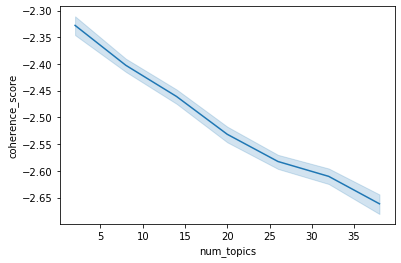

In [117]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling